In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cal_angle import cal_angle
from cal_distance import cal_distance

In [9]:
df = pd.read_csv("/home/osamu/horse_data/c100_21-23/position_id.csv", sep=',', index_col=0)

In [10]:
df

,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,nose_x,nose_y,...,right_front_paw_x,right_front_paw_y,left_back_paw_x,left_back_paw_y,right_back_paw_x,right_back_paw_y,x1,y1,x2,y2
frame,,,,,,,,,,,,,,,,,,,,,
1.0,1194.375000,549.375000,1250.625000,624.375000,1044.375000,736.875000,1138.125000,193.125000,781.875000,118.125000,...,1194.375000,155.625000,1006.875000,249.375000,1156.875000,174.375000,NaN,NaN,NaN,NaN
2.0,1175.625000,549.375000,1306.875000,624.375000,1044.375000,755.625000,1250.625000,605.625000,781.875000,118.125000,...,1194.375000,155.625000,1025.625000,268.125000,1119.375000,193.125000,NaN,NaN,NaN,NaN
3.0,838.125000,380.625000,1194.375000,268.125000,1025.625000,755.625000,1156.875000,211.875000,781.875000,118.125000,...,1194.375000,174.375000,1025.625000,643.125000,1119.375000,211.875000,NaN,NaN,NaN,NaN
4.0,819.375000,361.875000,1325.625000,568.125000,1025.625000,774.375000,1156.875000,249.375000,1531.875000,793.125000,...,1194.375000,155.625000,1063.125000,268.125000,1081.875000,230.625000,NaN,NaN,NaN,NaN
5.0,819.375000,361.875000,1194.375000,268.125000,1156.875000,211.875000,1156.875000,193.125000,800.625000,99.375000,...,1194.375000,155.625000,1063.125000,268.125000,1081.875000,230.625000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379.0,1550.737915,315.919037,1541.436401,306.617523,1597.245605,278.712952,1606.547119,260.109924,1476.325806,371.728119,...,1383.310669,511.250885,1001.948486,929.819092,918.234863,1041.437256,902.422302,224.620972,1854.897583,1067.624756
6380.0,1548.033691,321.866333,1548.033691,312.473541,1585.604858,274.902313,1594.997681,265.509491,1491.676880,368.830383,...,1322.606323,509.722504,928.108337,998.148499,928.108337,1054.505371,893.354919,224.124512,1855.178467,1067.711914
6381.0,1541.554321,324.079102,1541.554321,333.470825,1588.513062,286.512146,1607.296509,277.120422,1513.379150,408.604736,...,1579.121338,436.779938,996.833679,925.150208,940.483276,1047.242798,896.342041,227.339569,1858.055786,1068.848389


In [11]:
angles = []

for index, row in df.iterrows():
    right_foot_angle = cal_angle(
        (row['right_front_elbow_x'], row['right_front_elbow_y']),
        (row['right_front_knee_x'], row['right_front_knee_y']),
        (row['right_front_paw_x'], row['right_front_paw_y'])
    )
    angles.append(right_foot_angle)

df['right_foot_angle'] = angles

#同様に左前肢の角度を計算
angles = []

for index, row in df.iterrows():
    left_foot_angle = cal_angle(
        (row['left_front_elbow_x'], row['left_front_elbow_y']),
        (row['left_front_knee_x'], row['left_front_knee_y']),
        (row['left_front_paw_x'], row['left_front_paw_y'])
    )
    angles.append(left_foot_angle)

df['left_foot_angle'] = angles

#同様に右後肢の角度を計算
angles = []

for index, row in df.iterrows():
    right_foot_angle = cal_angle(
        (row['right_back_elbow_x'], row['right_back_elbow_y']),
        (row['right_back_knee_x'], row['right_back_knee_y']),
        (row['right_back_paw_x'], row['right_back_paw_y'])
    )
    angles.append(right_foot_angle)

df['right_back_foot_angle'] = angles

#同様に左後肢の角度を計算
angles = []

for index, row in df.iterrows():
    left_foot_angle = cal_angle(
        (row['left_back_elbow_x'], row['left_back_elbow_y']),
        (row['left_back_knee_x'], row['left_back_knee_y']),
        (row['left_back_paw_x'], row['left_back_paw_y'])
    )
    angles.append(left_foot_angle)

df['left_back_foot_angle'] = angles


/home/osamu/gpat-horse/GPAT/horse/cal_angle.py:23: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (length1 * length2)
/home/osamu/gpat-horse/GPAT/horse/cal_angle.py:23: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (length1 * length2)
/home/osamu/gpat-horse/GPAT/horse/cal_angle.py:23: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (length1 * length2)
/home/osamu/gpat-horse/GPAT/horse/cal_angle.py:23: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (length1 * length2)


In [12]:
#計算した角度を表示
df[df.columns[-4:]].head()

,right_foot_angle,left_foot_angle,right_back_foot_angle,left_back_foot_angle
frame,,,,
1.0,55.773638,49.694108,65.010186,51.160223
2.0,55.773638,41.801504,53.476081,50.194429
3.0,52.512144,37.647621,57.217941,74.483854
4.0,38.300717,20.900995,64.817384,52.172983
5.0,53.461288,45.748922,50.313763,49.949021


In [13]:
'''
左前脚と右後ろ脚、左後ろ足の距離:
左前足の踵: left_front_paw (x, y)
右後ろ足の踵: right_back_paw (x, y)
左後ろ足の踵: left_back_paw (x, y)


右前脚と右後ろ脚、左後ろ足の距離:
右前足の踵: right_front_paw (x, y)
右後ろ足の踵: right_back_paw (x, y)
左後ろ足の踵: left_back_paw (x, y)

の距離を計算する
'''

distances = []

for index, row in df.iterrows():
    distance = cal_distance(
        (row["right_front_paw_x"], row["right_front_paw_y"]),
        (row["right_back_paw_x"], row["right_back_paw_y"])
    )
    distances.append(distance)
    
df["right_front_right_back_distance"] = distances

distances = []

for index, row in df.iterrows():
    distance = cal_distance(
        (row["right_front_paw_x"], row["right_front_paw_y"]),
        (row["left_back_paw_x"], row["left_back_paw_y"])
    )
    distances.append(distance)

df["right_front_left_back_distance"] = distances

distances = []

for index, row in df.iterrows():
    distance = cal_distance(
        (row["left_front_paw_x"], row["left_front_paw_y"]),
        (row["right_back_paw_x"], row["right_back_paw_y"])
    )
    distances.append(distance)

df["left_front_right_back_distance"] = distances

distances = []

for index, row in df.iterrows():
    distance = cal_distance(
        (row["left_front_paw_x"], row["left_front_paw_y"]),
        (row["left_back_paw_x"], row["left_back_paw_y"])
    )
    distances.append(distance)

df["left_front_left_back_distance"] = distances

In [ ]:
df[df.columns[-4:]].head()

,right_front_right_back_distance,right_front_left_back_distance,left_front_right_back_distance,left_front_left_back_distance
frame,,,,
1.0,41.926275,209.631373,67.604086,188.435168
2.0,83.852549,202.812259,67.604086,154.616461
3.0,83.852549,498.199885,77.308230,445.682412
4.0,135.208173,172.866459,112.500000,136.502060
5.0,135.208173,172.866459,112.500000,136.502060


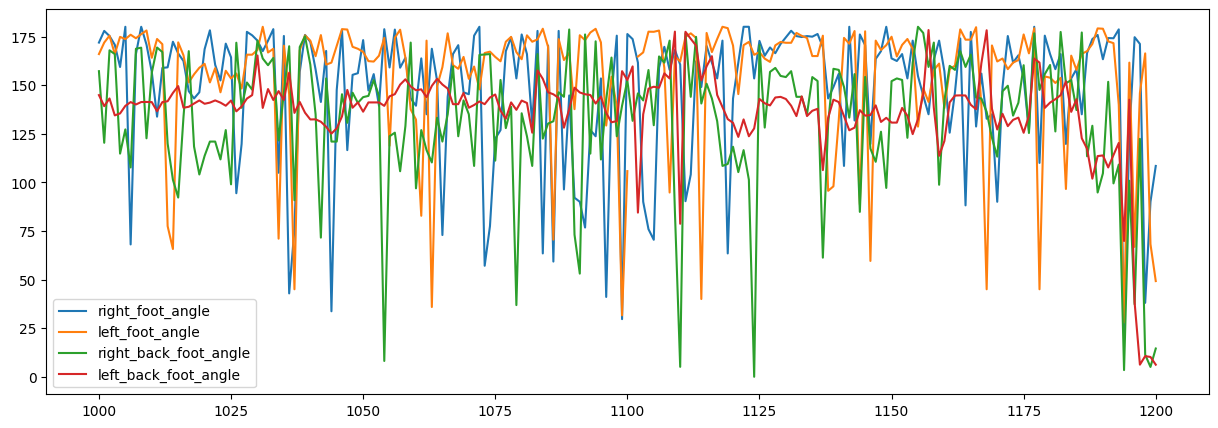

In [19]:
#indexが1000から2000までのデータをプロット
df_2 = df[1000:1200]

plt.figure(figsize=(15, 5))
plt.plot(df_2.index,df_2['right_foot_angle'], label='right_foot_angle')
plt.plot(df_2.index,df_2['left_foot_angle'], label='left_foot_angle')
plt.plot(df_2.index,df_2['right_back_foot_angle'], label='right_back_foot_angle')
plt.plot(df_2.index,df_2['left_back_foot_angle'], label='left_back_foot_angle')
plt.legend()
plt.show()

In [21]:
import plotly.graph_objects as go

# Figureを作成
fig = go.Figure()

# 各角度の折れ線グラフを追加
fig.add_trace(go.Scatter(x=df.index, y=df['right_foot_angle'], mode='lines', name='right_foot_angle'))
fig.add_trace(go.Scatter(x=df.index, y=df['left_foot_angle'], mode='lines', name='left_foot_angle'))
fig.add_trace(go.Scatter(x=df.index, y=df['right_back_foot_angle'], mode='lines', name='right_back_foot_angle'))
fig.add_trace(go.Scatter(x=df.index, y=df['left_back_foot_angle'], mode='lines', name='left_back_foot_angle'))

# レイアウトを設定
fig.update_layout(
    title='Angles Over Time',
    xaxis_title='Time',
    yaxis_title='Angle (degrees)',
    legend_title='Angles',
    width=900,
    height=500
)

# グラフを表示
fig.show()

In [27]:
df['y1'].isnull().sum()

1555

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6383 entries, 1.0 to 6383.0
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   left_eye_x                       6383 non-null   float64
 1   left_eye_y                       6383 non-null   float64
 2   right_eye_x                      6383 non-null   float64
 3   right_eye_y                      6383 non-null   float64
 4   left_ear_x                       6383 non-null   float64
 5   left_ear_y                       6383 non-null   float64
 6   right_ear_x                      6383 non-null   float64
 7   right_ear_y                      6383 non-null   float64
 8   nose_x                           6383 non-null   float64
 9   nose_y                           6383 non-null   float64
 10  throad_x                         6383 non-null   float64
 11  throad_y                         6383 non-null   float64
 12  tailbaes_x           

In [34]:
import os

img_dir = "/home/osamu/horse_data/0510/bigred-c100/2024-05-10"
img_files = os.listdir(img_dir)
img_files.sort()
#21_23_04.43.jpgが何番目にあるかを確認
img_files[100]

'21_04_58.91.jpg'

In [33]:
df.loc[349,'x1']

653.9808349609375